In [84]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Найдена линия. Длина отрисованного сегмента: 1998.77


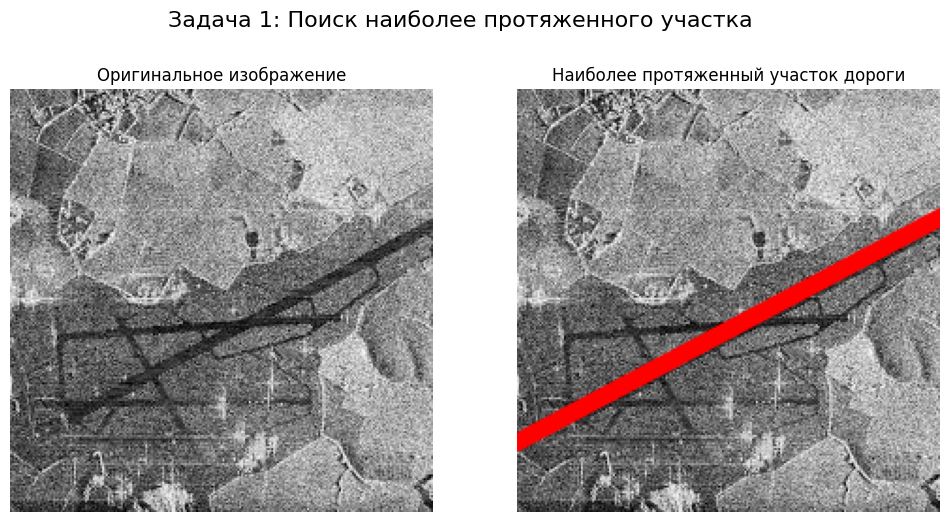

In [85]:
image = cv2.imread("sar_3.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
canny = cv2.Canny(blur, 100, 200)

lines = cv2.HoughLines(canny, 1, np.pi / 180, threshold=100)

image_line = np.copy(image_rgb)
longest_line_points = None
max_length = 0

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        longest_line_points = (pt1, pt2)
        max_length = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)


if longest_line_points:
    cv2.line(image_line, longest_line_points[0], longest_line_points[1], (255, 0, 0), 7, cv2.LINE_AA)
    print(f'Найдена линия. Длина отрисованного сегмента: {max_length:.2f}')
else:
    print("Линий не обнаружено")

plt.figure(figsize=(12, 6))
plt.suptitle('Задача 1: Поиск наиболее протяженного участка', fontsize=16)

plt.subplot(1, 2, 1)
plt.title('Оригинальное изображение')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Наиболее протяженный участок дороги")
plt.imshow(image_line)
plt.axis('off')

plt.show()

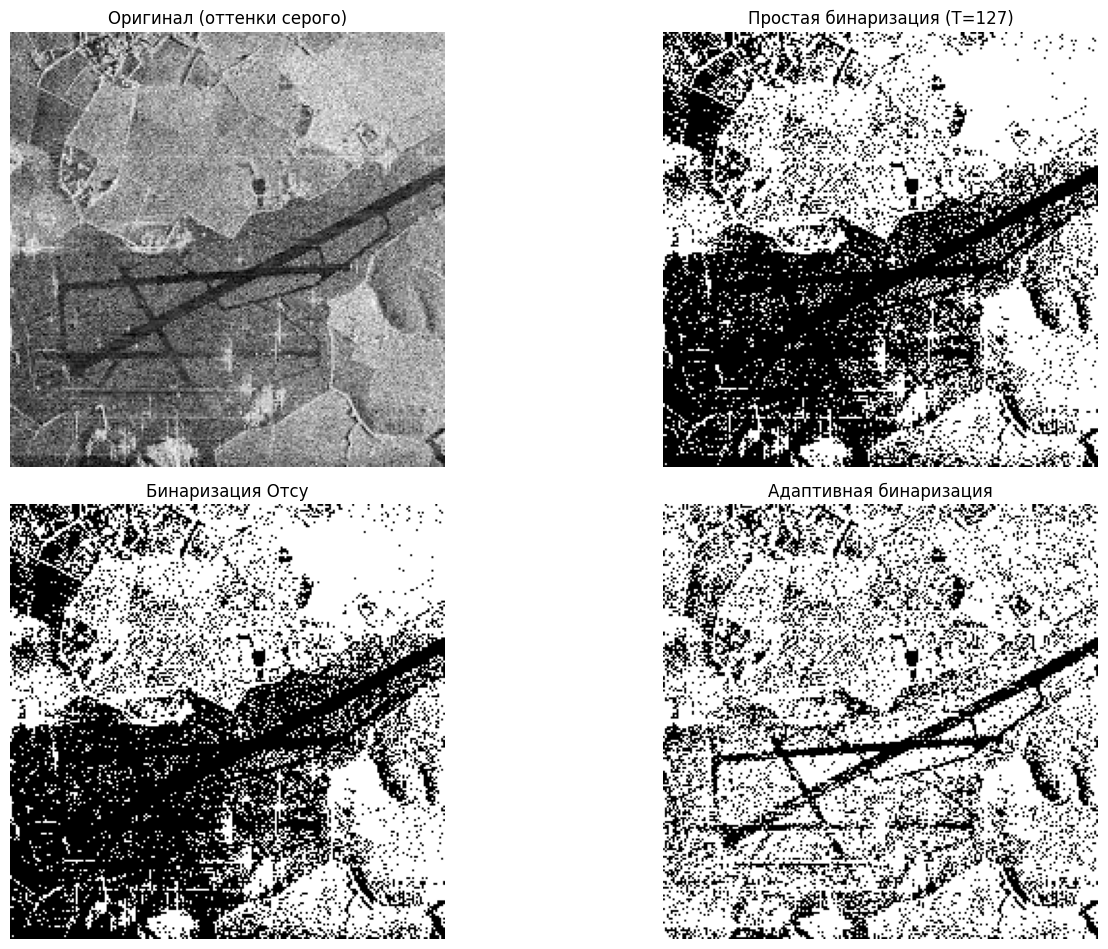


Анализ завершен.


In [ ]:
_, bin_simple = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

_, bin_otsu = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

bin_adaptive = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 71, 21)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Оригинал (оттенки серого)')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Простая бинаризация (T=127)')
plt.imshow(bin_simple, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Бинаризация Отсу')
plt.imshow(bin_otsu, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Адаптивная бинаризация')
plt.imshow(bin_adaptive, cmap='gray')
plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()